# Notes on Jesse's simulations

This notebook collects notes and graphs Jesse made for the 9Be+2n Monte Carlo

In [9]:
using Plots

## 1 - 10Be + 1n spherical non-resonant

First step we simulate one neutron emission from a non-resonant (flat distribution) state 250 keV above threhsold. The emission is purely spherical.

Energy (constant distribution) and polar coordinate distributions from Jesse's code:

In [10]:
energy=[255.14
258.73
245.03
255.77
258.53
252.9
254.57
248.03
243.42
258.46
252.42
257.52
243.03
249.51
255.86
240.76
259.57
246.78
259.9
250.85
254.33
245.7
244.87
244.39
240.96
244.24
259.32
249.71
250.83
243.52
241.04
253.45
241.64
241.55
248.14
243.93
254.18
258.68
247.26
259.02
243.56
244.17
252.87
244.69
247.18
242.2
241.42
243.34
250.2
252.3
240.75
252.25
251.24
245.25
256.34
245.75
252.92
244.02
255.3
254.34
250.54
252.39
256.93
248.62
249.88
243.86
251.03
241.59
248.0
257.05
246.54
244.56
245.08
245.21
253.89
249.74
251.42
247.65
247.5
252.38
254.83
252.8
247.36
252.31
259.22
242.04
254.38
258.59
253.89
240.93
245.44
251.64
258.12
248.45
250.54
249.76
258.83
256.72
240.82
255.9
]

theta=[1.46, 1.52, 2.73, 0.56, 1.59, 2.76, 0.5, 2.55, 1.93, 1.57, 0.57, 1.27, 0.34, 0.89, 1.29, 0.48, 0.82, 0.61, 1.51, 0.94, 2.28, 2.18, 0.25, 2.1, 1.77, 2.03, 0.3, 0.37, 2.52, 1.04, 2.61, 1.17, 0.83, 2.12, 2.09, 2.62, 0.71, 0.99, 1.21, 1.68, 1.71, 1.36, 2.52, 2.57, 2.4, 0.95, 2.86, 1.95, 2.98, 1.38, 2.83, 0.02, 0.65, 1.99, 0.94, 0.41, 1.67, 2.49, 2.05, 1.68, 1.39, 0.36, 2.3, 1.86, 0.04, 2.34, 0.68, 1.0, 0.58, 2.94, 1.97, 1.97, 2.24, 2.96, 1.75, 1.26, 2.66, 0.88, 2.56, 2.44, 2.17, 2.92, 0.26, 2.05, 1.34, 0.32, 2.66, 1.9, 0.44, 0.34, 2.17, 0.84, 1.57, 0.78, 0.44, 0.26, 1.84, 0.45, 0.64, 2.7


]

100-element Vector{Float64}:
 1.46
 1.52
 2.73
 0.56
 1.59
 2.76
 0.5
 2.55
 1.93
 1.57
 ⋮
 0.84
 1.57
 0.78
 0.44
 0.26
 1.84
 0.45
 0.64
 2.7

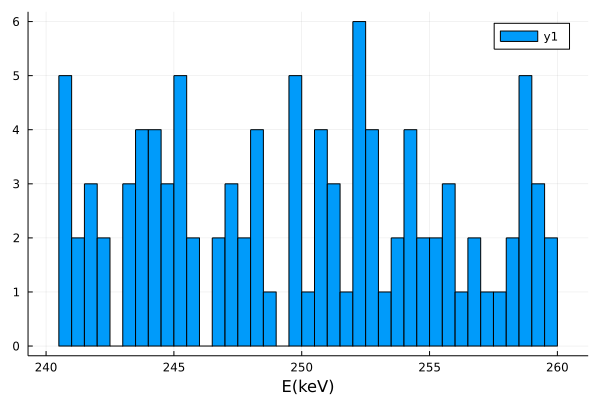

In [11]:
plot(energy,seriestype=:hist,bins=50,xlabel="E(keV)")

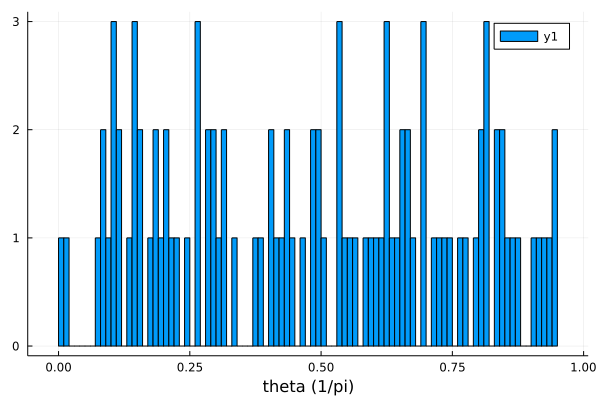

In [12]:
plot(theta./pi,seriestype=:hist,bins=100, xlabel="theta (1/pi)")

## Simulation of the Lorentz resonance

We plot a realistic (see below) resonance to check for the correct Lorentz normalization. From the definition of a [Lorentz](https://en.wikipedia.org/wiki/Cauchy_distribution) (Cauchy) distribution we set the normalization factor to $\frac{1}{\pi\Gamma}$.

We assume:
- Li-11 beta decay populates the 10.56 meV state in $^{11}Be$. 
- The 10.56 MeV state emits one neutron to the 9.54 MeV state in ${^{10}}Be$ (with 0.5 MeV separation energy).
- The 9.54 MeV state is a well known resonance in the $^{9}Be+n$ reaction. We model it as a 2.8 MeV neutron emission to the ground state of $^9Be$.
- Resonance widths: 
    - $^{10}Be+n:$ ($E_x=9.54~MeV$ + $0.5~MeV~S_n$), never been observed, we assume  $\Gamma=250~keV$ from the $^6He + \alpha$ channel
     - $^{9}Be+n:~E_n=2.8~MeV;~\Gamma=400$ keV

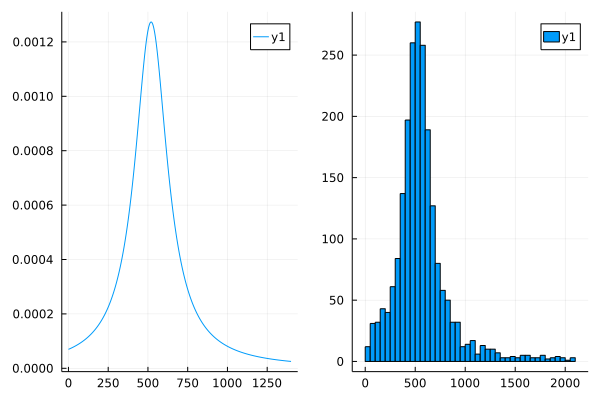

In [59]:
Ex=10560-9540-500;Gamma=250
one=plot([00:1400],x->(1/(4*3.1415*Gamma))*Gamma^2/((Ex-x)^2+Gamma^2/4))
N=0
E=[]
    for i in rand((0:2100),10000), j in rand(Float64,1000)
        w=(1/(4*3.1415*Gamma))*Gamma^2/((Ex-i)^2+Gamma^2/4)
        if (j<=w) push!(E,i) end
    end
 
    
two=plot(E,seriestype=:hist)
plot(one,two)

# print(N)

Using energy and momentum conservation for one 11Be neutron emission we get:

$E_{10Be}+E_{n}=E_{11Be}$

where $E_{11Be}$ is the excitation energy of $^{11}Be$. Since $E=\frac{p^2}{mc^2}$ and combining with momentum conservation ($p^2_{10Be}=p^2_{n}=p^2$) we get

$\frac{p^2}{10mc^2}+\frac{p^2}{mc^2}=E_{11Be}$

solving the equation for $p$ and calculating each individal energy we get

$E_{10Be}=\frac{1}{11}E_{11Be}$ and $E_n=\frac{10}{11}E_{11Be}$

The much larger mass of $^{10}Be$ makes its recoil velocity small for the same momentum, making the its total energy much smaller than that of the neutron. Sometimes we can assume, to first order, the neutron energy equal to the resonance energy

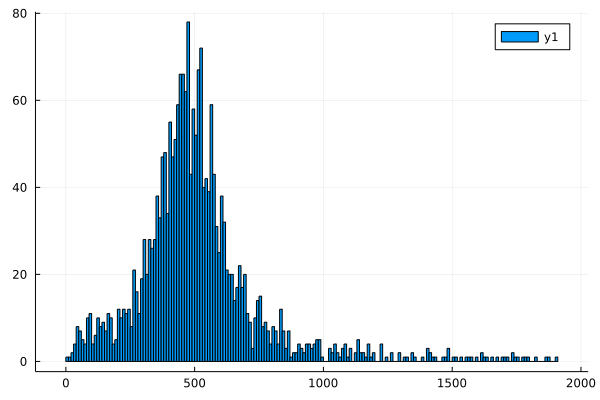

In [60]:
En = 10/11 .* E
plot(En,seriestype=:hist,nbins=200)

### Simulation of the second Lorentz resonance in CM

Now we can simulate the breakup of $^{10}$Be in $^{9}Be$ and a neutron. We can repeat the process exactly as above

$E_{n}=\frac{9}{10}E_{10Be} 

Let's assume the resonance is 100 keV above the neutron separation threshold.

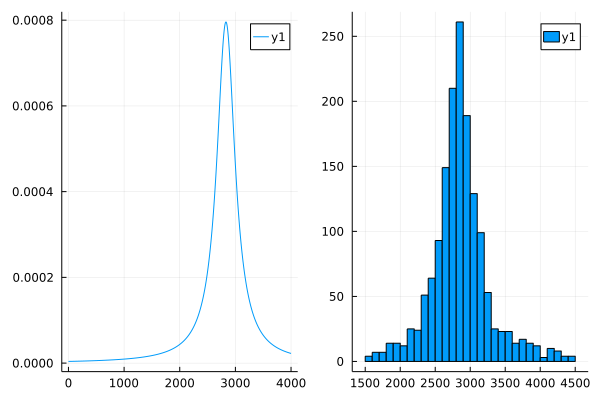

In [61]:
Ex=2830;Gamma=400
one=plot([0:4000],x->(1/(4*3.1415*Gamma))*Gamma^2/((Ex-x)^2+Gamma^2/4))
N=0
eTwo=[]
    for i in rand((1500:4500),10000), j in rand(Float64,1000)
        w=(1/(4*3.1415*Gamma))*Gamma^2/((Ex-i)^2+Gamma^2/4)
        if (j<=w) push!(eTwo,i) end
    end
 
    
two=plot(eTwo,seriestype=:hist)
plot(one,two)



Again, we calculate the neutron energy from momentum conservation: $\frac{9}{10} • E_x$

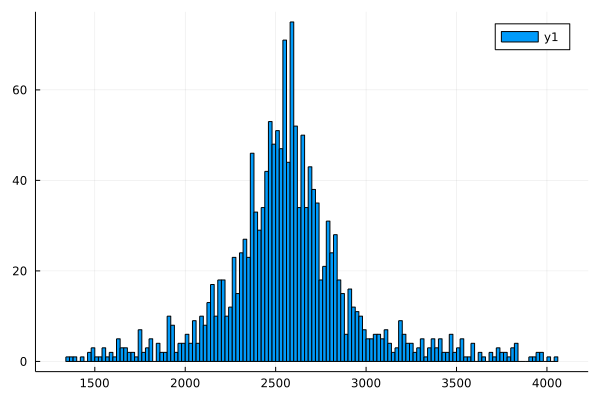

In [62]:
EnTwo = 9/10 .* eTwo
plot(EnTwo,seriestype=:hist,nbins=200)

Finally we plot both peaks for a complete neutron spectrum:

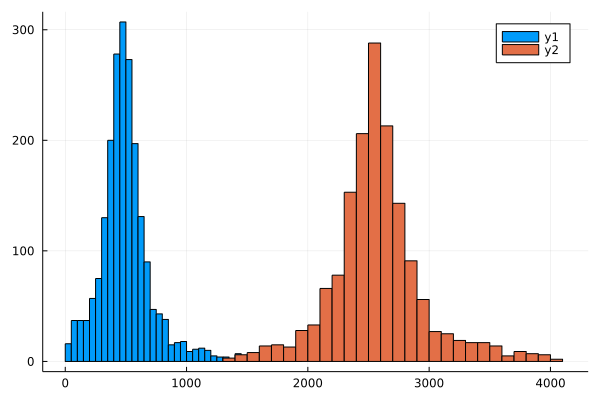

In [63]:
plot(En,seriestype=:histogram)
plot!(EnTwo,seriestype=:histogram)

Now the best part, we convert it to Time of Flight with 150 cm flight path.

$tof=\frac{0.7451*d*\sqrt{E_n}}{E_n}$ with $E_n$ in MeV and $d$ in cm

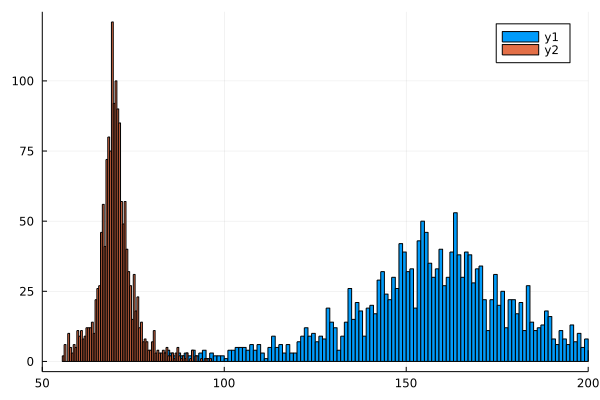

In [67]:
tof1=[]; for i in En push!(tof1, 0.7451 * 150 * sqrt(i/1000) / (i/1000)) end
tof2=[]; for i in EnTwo push!(tof2, 0.7451 * 150 * sqrt(i/1000) / (i/1000)) end

plot(tof1,seriestype=:histogram,xlims=(50,200),nbins=1200)
plot!(tof2,seriestype=:histogram,xlims=(50,200),nbins=120)

### Center of Mass correction

The simplest possible approximation assumes the momentum of the recoiling 10Be is negligible compared to the neutron energy. In reality the energy is one order of magnitude smaller, and thus the recoil velocity is two orders of magnitude smaller than that of the neutron. This spreads out the second neutron energy by a very small amount.

## 2D plot of the neutron energies against the total sum energy

We construct the regular neutron energy scatter:

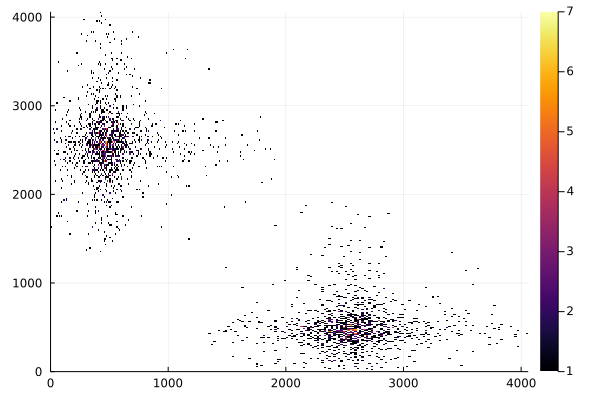

In [65]:
if length(En) > length(EnTwo) listLength=length(EnTwo) else listLength=length(En) end

scatter=plot(En[1:listLength],EnTwo[1:listLength],seriestype=:histogram2d,bins=200)
scatter=plot!(EnTwo[1:listLength],En[1:listLength],seriestype=:histogram2d,bins=200)

plot(scatter)

And the classical Fynbo plot:

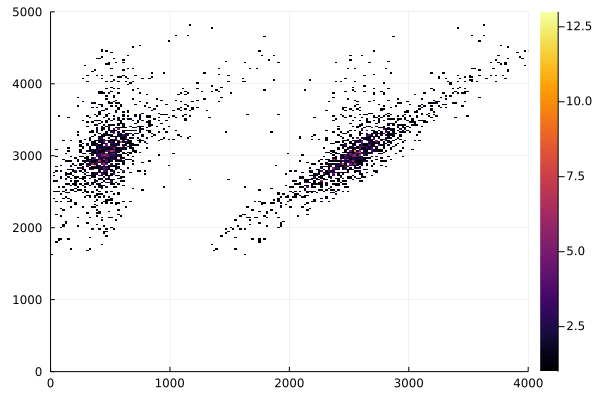

In [66]:
EnTotal=vcat(En[1:listLength],EnTwo[1:listLength])
Esum=En[1:listLength].+EnTwo[1:listLength]
EsumTotal=vcat(Esum,Esum)
fynbo1=plot(En[1:listLength],En[1:listLength].+EnTwo[1:listLength],seriestype=:histogram2d)
fynbo2=plot(EnTwo[1:listLength],En[1:listLength].+EnTwo[1:listLength],seriestype=:histogram2d)

fynbo=plot(EnTotal,EsumTotal,seriestype=:histogram2d,xlims=(0,4000),ylims=(0,5000),bins=200)